# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

### Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [0]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Гистограмма распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

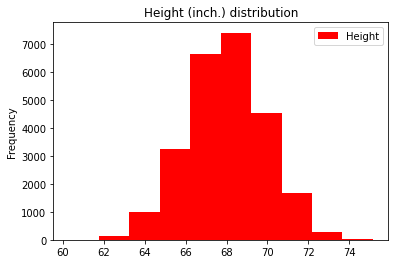

In [0]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

Гистограмма распределения веса с помощью метода *plot* Pandas DataFrame.

In [0]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


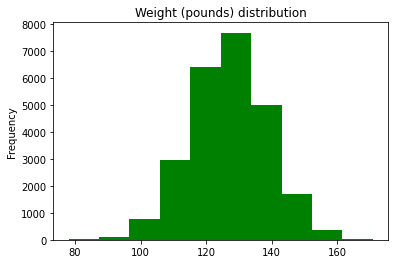

In [0]:
data.Weight.plot(kind = 'hist', title = 'Weight (pounds) distribution', color = 'green')

Ввод нового признака - *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [0]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [0]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. 

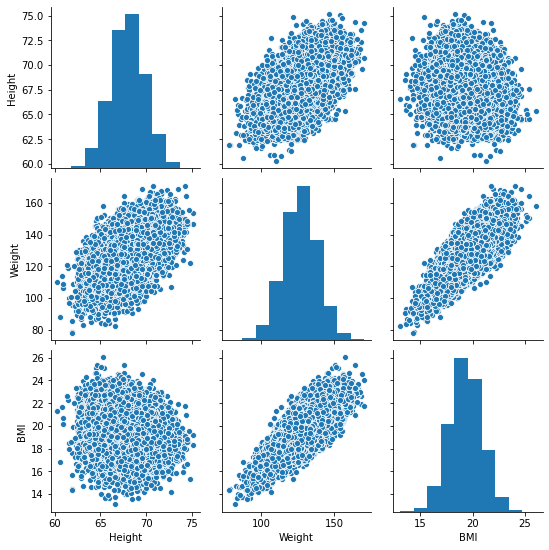

In [0]:
sns.pairplot(data) 

Создание еще одного нового признака *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. 

В итоге: «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. 


[Text(0, 0.5, 'Рост'), Text(0.5, 0, 'Весовая категория')]

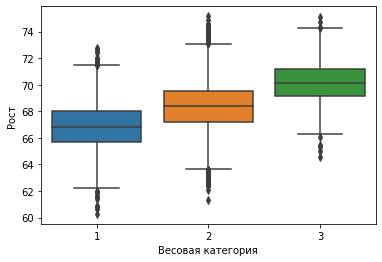

In [0]:
def weight_category(weight):
    weight_category = None
    if weight < 120:
        weight_category = 1
    elif weight >= 150:
        weight_category = 3
    else:
        weight_category = 2
    return weight_category
    # Ваш код здесь

data['weight_cat'] = data['Weight'].apply(weight_category)

data['weight_cat'] = data['Weight'].apply(weight_category)
ax = sns.boxplot(data = data, x = 'weight_cat', y = 'Height')
ax.set(ylabel = u'Рост', xlabel = u'Весовая категория') # Ваш код здесь

Scatter plot зависимости роста от веса

[Text(0, 0.5, 'Рост'), Text(0.5, 0, 'Вес')]

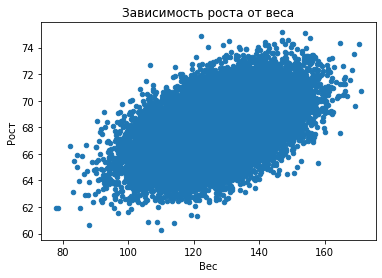

In [0]:
ax = data.plot(kind = 'scatter', x = 'Weight', y = 'Height', title = u'Зависимость роста от веса')
ax.set(xlabel = u'Вес', ylabel = u'Рост') 

## 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

Далее написана функция, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [0]:
def get_y(w0, w1, x):
    return w0 + w1*x

def get_error(w0, w1):
    return sum(map(lambda x, y: (y - get_y(w0, w1, x)) ** 2, data.Weight, data.Height))
    

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.


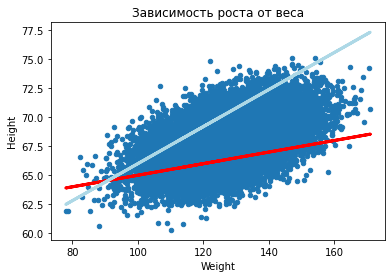

In [0]:
data.plot.scatter(x='Weight', y='Height', title='Зависимость роста от веса')

plt.plot(data.Weight, get_y(60, 0.05, data.Weight), color='red', linewidth=3)

plt.plot(data.Weight, get_y(50, 0.16, data.Weight), color='lightblue', linewidth=3)


Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

График зависимости функции ошибки от параметра $w_1$ при $w_0$ = 50. 

Text(0.5, 1.0, 'Зависимость функции ошибки от w1')

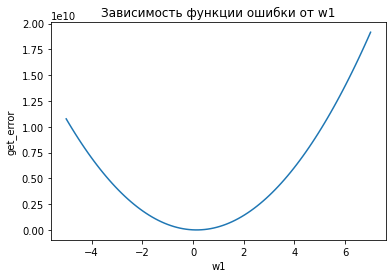

In [0]:
plt.plot(np.linspace(-5, 7, 100), get_error(50, np.linspace(-5, 7, 100)))

plt.xlabel('w1')
plt.ylabel('get_error')
plt.title('Зависимость функции ошибки от w1')

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции для значений параметра  $w_1$ в диапазоне [-5,5]. 

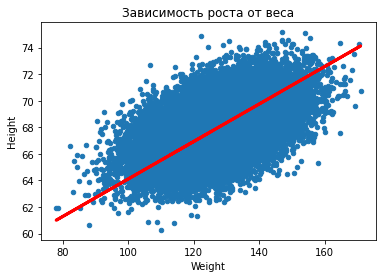

In [0]:
from scipy import optimize

w0 = 50
w1_opt = optimize.minimize_scalar(lambda x: get_error(w0, x), bounds = [-5, 5]).x

data.plot.scatter(x='Weight', y='Height', title='Зависимость роста от веса')

plt.plot(data.Weight, get_y(w0, w1_opt, data.Weight), color='red', linewidth=3)

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [0]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

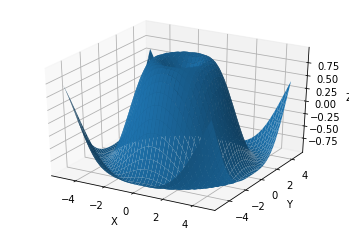

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

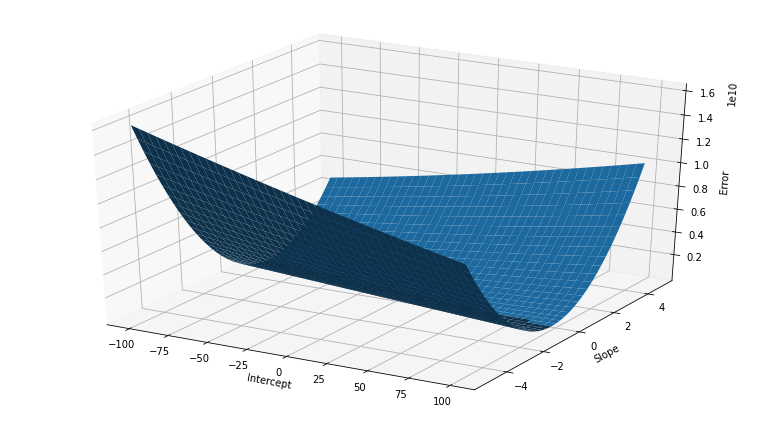

In [0]:
fig = plt.figure()
fig.set_size_inches(13.5, 7.5)
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
W0 = np.arange(-100, 101, 1)
W1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(W0, W1)
ERR = get_error(W0, W1)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, ERR)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')

plt.show()

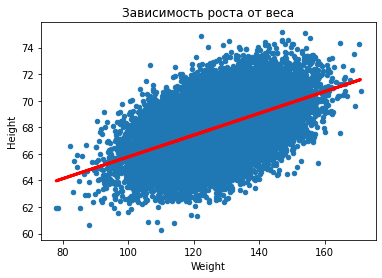

In [0]:
w0_opt, w1_opt = optimize.minimize(lambda w: get_error(w[0], w[1]), (0, 0), bounds = ((-100, 100), (-5, 5)), method='L-BFGS-B').x

data.plot.scatter(x='Weight', y='Height', title='Зависимость роста от веса')

plt.plot(data.Weight, get_y(w0_opt, w1_opt, data.Weight), color='red', linewidth=3)